# 다항 회귀(Polynomial Regression) 알아보기
---
다항 회귀(Polynomial Regression)란, 독립 변수 $x$ 와 종속 변수 $y$ 사이의 관계를 나타낼 때, $x$ 의 $n$ 차 다항식으로 표현되는 회귀 분석입니다. 우리가 흔히 배우는 단순 회귀(Simple Regression)와는 달리, 더욱 복잡한 문제를 해결할 수 있지요.  
</p></br></br>

* 단순 회귀: $y = ax + b$ 로 나타낼 수 있는 문제를 해결할 수 있습니다.
* 다항 회귀: $y = ax^n + bx^{(n-1)} + ... + cx + d$ 로 나타낼 수 있는 문제를 해결할 수 있습니다.
</p></br></br>

이번에는, 파이썬(Python)의 머신러닝 패키지인 사이킷런(scikit-learn)을 활용해 다항 회귀를 구현해 보도록 하겠습니다. 사이킷런에서는 `PolynomialFeatures` 라는 클래스로 해당 기능을 지원하고 있습니다.
</p></br></br>

## 학습용 데이터 생성
---
우선, 다항 회귀를 수행할 수 있는 학습용 데이터를 생성해 보겠습니다. 2차 함수로 표현할 수 있는 임의의 데이터를 생성할건데요, `numpy.random.randint` 함수를 이용해 생성한 뒤 해당 데이터를 시각화해 보겠습니다.
</p></br></br>


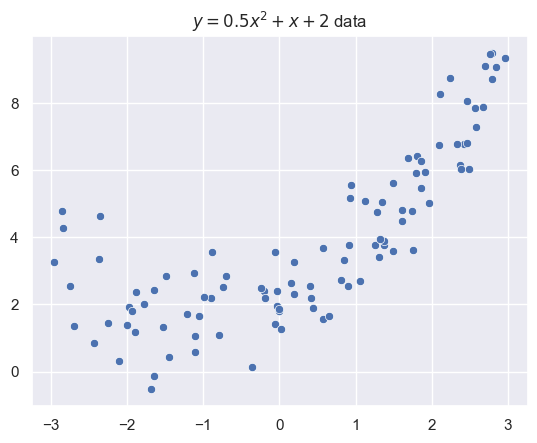

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.random.seed(12345)

X = np.random.uniform(-3, 3, 100).reshape(-1, 1)  # -3에서 3 사이의 임의의 값 100개 (2차원 데이터)
y = 0.5 * X**2 + X + 2  # y = 0.5x^2 + x + 2 데이터
noise = np.random.normal(0, 1, y.shape)  # 평균 0, 표준편차 1 가우시안 노이즈
y = y + noise

sns.scatterplot(x=X.flatten(), y=y.flatten())
plt.title('$y = 0.5x^2 + x + 2$ data')
plt.show()

</p></br></br>

## 사이킷런 PolynomialFeatures
---
이제 준비된 데이터를 활용해 다항 회귀 분석을 진행하도록 하겠습니다. `sklearn.preprocessing.PolynomialFeatures` 클래스를 활용하면 분석을 손쉽게 수행할 수 있습니다. 이 때, degree라는 매개변수를 입력할 수 있는데요, 몇차 방정식에 해당하는 데이터를 분석할 수 있을지 결정하는 것으로 이해하면 됩니다.  
</p></br></br>

PolynomialFeatures에 사용할 수 있는 매개변수는 아래와 같습니다.  

* degree: 다항식의 차수를 설정할 수 있습니다.
* interaction_only: True로 설정하면 각 원소의 곱으로만 이루어진 결과를 반환하며, False로 설정할 경우 제곱항을 포함해서 반환합니다.
* include_bias: True로 설정하면 상수 항(1)을 추가합니다.
</p></br></br>

만약 PolynomialFeatures를 이용해 $a, b$를 변환할 경우, 아래와 같은 결과가 반환됩니다.  

$1, a, b, a^2, a*b, b^2$  
</p></br></br>


In [2]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

X_poly = poly_features.fit_transform(X)

poly_features.fit_transform([[2,6]])  # 2, 6 데이터 변환 예제

array([[ 1.,  2.,  6.,  4., 12., 36.]])

</p></br></br>

이제, 변환한 X_ploy 데이터에 선형 회귀 모델을 적용하면 해당 데이터의 절편과 가중치를 얻을 수 있습니다.  

* 절편 $\theta_0$: `intercept_` 인스턴스 변수
* 가중치 $\theta_1, \theta_2$: `coef_` 인스턴스 변수
</p></br></br>


In [3]:
from sklearn.linear_model import LinearRegression

# Simple Regression
simple_reg = LinearRegression()
simple_reg.fit(X, y)

# Polynomial Regression
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
poly_reg.intercept_, poly_reg.coef_

(array([2.10899671]), array([[0.        , 1.02503938, 0.47601066]]))

</p></br></br>

## 2차 함수 그리기
---
다항 회귀를 이용해 만든 2차 함수를 시각화하도록 하겠습니다. 실제 데이터와 얼마나 유사하게 함수를 작성했는지 확인할 수 있도록, 단순선형회귀 결과와 함꼐 비교해 보도록 하지요.  
</p></br></br>


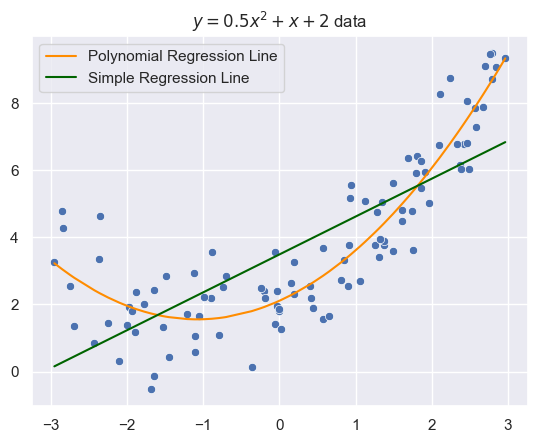

In [4]:
sns.scatterplot(x=X.flatten(), y=y.flatten())
sns.lineplot(x=X.flatten(), y=poly_reg.predict(X_poly).flatten(), color='darkorange', label='Polynomial Regression Line')
sns.lineplot(x=X.flatten(), y=simple_reg.predict(X).flatten(), color='darkgreen', label='Simple Regression Line')

plt.title('$y = 0.5x^2 + x + 2$ data')
plt.show()